In [68]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [75]:
secret = '01010101101011'

In [76]:
circuit = QuantumCircuit(len(secret)+1,len(secret))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secret)))
circuit.x(len(secret))
circuit.h(len(secret))


circuit.barrier()

for ii, yesno in enumerate(reversed(secret)):
    if yesno == '1':
        circuit.cx(ii, len(secret))

# circuit.cx(5,6)
# circuit.cx(3,6)
# circuit.cx(0,6)

circuit.barrier()

# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secret)))
circuit.barrier()
circuit.measure(range(len(secret)), range(len(secret)))
# circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])

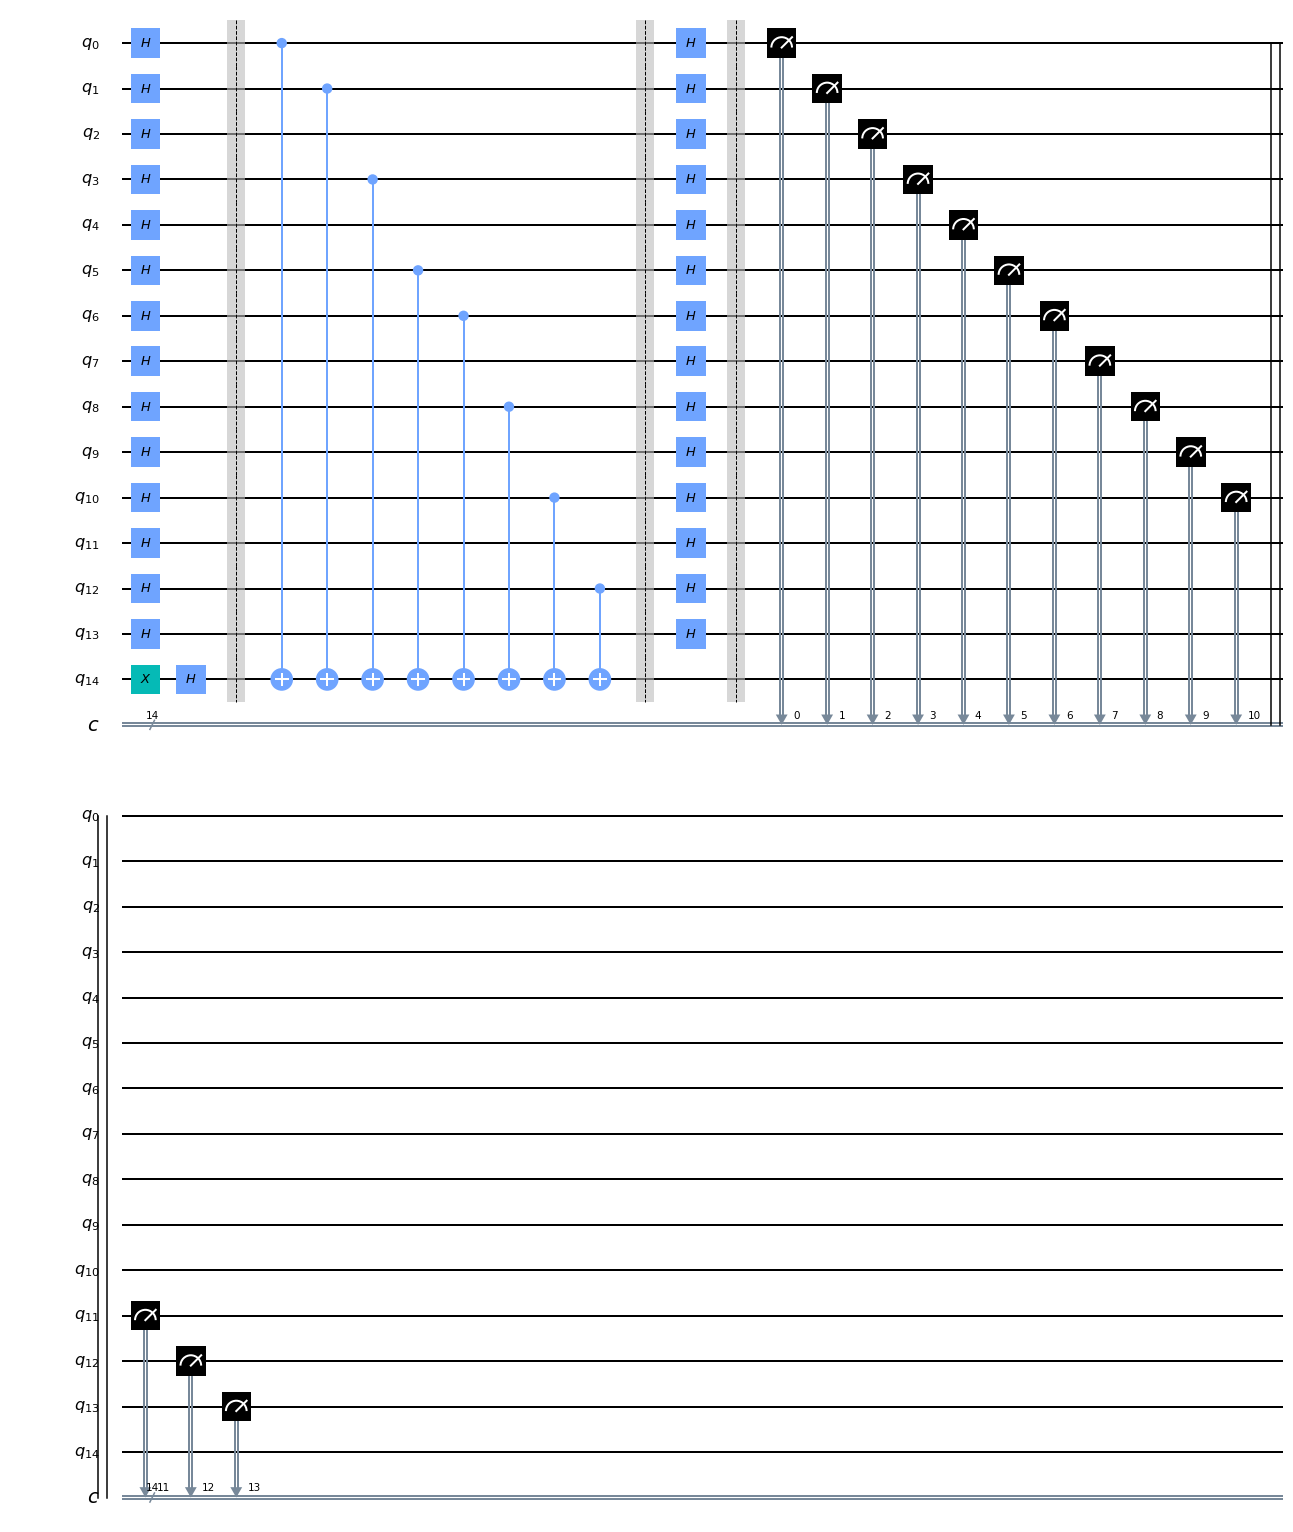

In [77]:
circuit.draw(output = 'mpl')

{'01010101101011': 1}


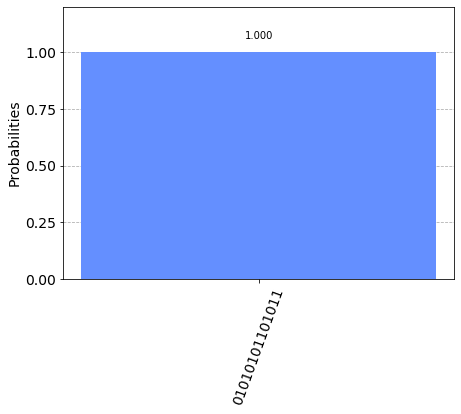

In [78]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
print(result.get_counts())
plot_histogram(result.get_counts())

In [79]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quantumComputer = provider.get_backend('ibmq_16_melbourne')

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


An error occurred while sending download completion acknowledgement: "HTTPSConnectionPool(host='api.quantum-computing.ibm.com', port=443): Read timed out. (read timeout=None)"


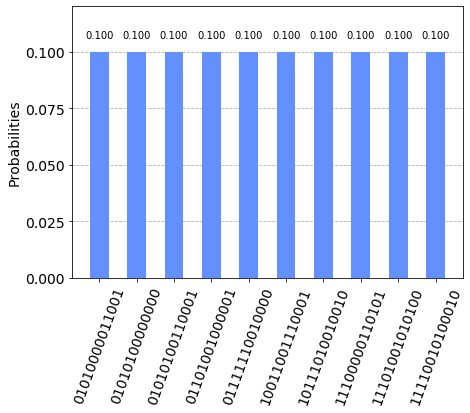

In [82]:
job = execute(circuit, backend = quantumComputer, shots = 10)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts())

In [83]:
print(result.get_counts())

{'01010100000000': 1, '10011001110001': 1, '11100000110101': 1, '10111010010010': 1, '01111110010000': 1, '01010000011001': 1, '01101001000001': 1, '11101001010100': 1, '01010100110001': 1, '11110010100010': 1}
